<div style="border:solid green 2px; padding: 20px">
    
<b>Привет!</b>

Меня зовут Сергей, я буду проводить ревью твоего проекта. 

Моя основная цель — поделиться опытом, помочь тебе подготовить проект максимально качественно для твоего в портфолио!
    
<div class="alert alert-danger">🔴</div>

>  Важные замечания. Их важно учесть, перед тем как показывать работу другим специалистам.

<div class="alert alert-warning">🟡</div>  

> Небольшие замечания. Если их ты тоже учтешь, твой проект станет только лучше.

<div class="alert alert-success">🟢</div>

> Правильные и верные действия, а также все остальные комментарии.

# Описание проекта

"МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Дано: датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

# Описание даннах

- instance_id -Уникальный идентификатор трека
- track_name - Название трека
- acousticness - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
- danceability - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
- duration_ms - Продолжительность трека в миллисекундах.
- energy - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
- instrumentalness - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
- key - базовый ключ (нота) произведения
- liveness - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
- loudness - Общая громкость трека в децибелах (дБ)
- mode - Указывает на модальность (мажорную или минорную) трека
- speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
- tempo - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
- obtained_date - дата загрузки в сервис
- valence - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
- music_genre - Музыкальный жанр трека

# План работы

- загрузка и ознакомление с данными,
- предварительная обработка,
- полноценный разведочный анализ,
- разработка новых синтетических признаков,
- проверка на мультиколлинеарность,
- отбор финального набора обучающих признаков,
- выбор и обучение моделей,
- итоговая оценка качества предсказания лучшей модели,
- анализ важности ее признаков.

<div class="alert alert-success">🟢</div>

> Отличное описание задачи и данных, есть план работы и заложена структура проекта! 👍🏻

### 1. Загрузка и ознакомление с данными

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import math
import time
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

<div class="alert alert-warning">🟡</div>

> Похоже, не все импортированные библиотеки используются.

In [2]:
df_test = pd.read_csv('C:/Users/geras/Downloads/kaggle_music_genre_test.csv')


In [3]:
df_train = pd.read_csv('C:/Users/geras/Downloads/kaggle_music_genre_train.csv')

In [4]:
data = pd.read_csv("C:/Users/geras/Downloads/sample_submit.csv")

<div class="alert alert-warning">🟡</div>

> Предпочтительнее указывать относительные пути к данным.  
> Можно вынести их в виде констант в начало проекта: будет еще удобнее.

In [5]:
data

,instance_id,music_genre
0,48564,Hip-Hop
1,72394,Alternative
2,88081,Rap
3,78331,Anime
4,72636,Anime
...,...,...
5094,50532,Alternative
5095,26255,Blues
5096,67924,Electronic
5097,79778,Country


In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
df_test

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094,50532,What We Gonna Do About It,0.108000,0.558,163049.0,0.767,0.00000,E,0.0954,-4.561,Minor,0.0491,158.019,4-Apr,0.715
5095,26255,Marilyn (feat. Dominique Le Jeune),0.131000,0.435,196216.0,0.641,0.00000,A#,0.2730,-7.274,Major,0.1040,115.534,3-Apr,0.156
5096,67924,Bipolar,0.152000,0.756,243373.0,0.787,0.00000,D,0.2050,-7.423,Major,0.2400,123.405,4-Apr,0.459
5097,79778,Dead - NGHTMRE Remix,0.001450,0.489,185600.0,0.974,0.63800,F#,0.1230,-2.857,Minor,0.0381,150.036,4-Apr,0.665


In [8]:
df_train

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,47396.0,O Pato,0.71900,0.725,-1.0,0.483,0.000000,NaN,0.0797,-13.314,Minor,0.0438,87.413,4-Apr,0.942,Jazz
20390,44799.0,Mt. Washington,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,Minor,0.0299,76.879,4-Apr,0.174,Rock
20391,33350.0,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,Major,0.0358,146.803,4-Apr,0.942,Alternative
20392,77920.0,4Peat,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,Major,0.3560,150.016,4-Apr,0.215,Rap


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

Данные выгрузились корректно, можно приступать к предобработке.

In [11]:
df_test.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,5099.000000,5099.000000,5099.000000,5.099000e+03,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,4978.000000,5099.000000
mean,55643.871347,0.276324,0.561888,2.173974e+05,0.622030,0.165198,0.197924,-8.630186,0.092718,121.246463,0.465593
std,20762.384803,0.322657,0.170502,1.156374e+05,0.251829,0.311940,0.166241,5.619766,0.100130,29.875950,0.244217
min,20012.000000,0.000002,0.059600,-1.000000e+00,0.001540,0.000000,0.020400,-46.122000,0.022600,37.114000,0.020500
25%,37571.000000,0.016600,0.451000,1.737335e+05,0.465000,0.000000,0.096950,-10.231000,0.035700,96.070250,0.272000
50%,55246.000000,0.120000,0.568000,2.175000e+05,0.660000,0.000157,0.129000,-7.135000,0.048700,120.053500,0.458000
75%,73702.000000,0.460000,0.681000,2.642470e+05,0.826000,0.092750,0.248000,-5.127000,0.096550,141.934250,0.650000
max,91709.000000,0.996000,0.977000,1.360027e+06,0.999000,0.994000,0.990000,1.949000,0.918000,216.029000,0.982000


In [12]:
df_train.describe()

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,55973.846916,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,20695.792545,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,38157.250000,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,56030.000000,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,73912.750000,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


### 2. Предварительная обработка и исследовательский анализ данных

Для начала, проверим данные на наличие дубликаиов.


In [13]:
df_train.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 735
liveness              0
loudness              0
mode                506
speechiness           0
tempo               442
obtained_date         0
valence               0
music_genre           0
dtype: int64

In [14]:
df_test.isna().sum()

instance_id           0
track_name            0
acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
key                 158
liveness              0
loudness              0
mode                149
speechiness           0
tempo               121
obtained_date         0
valence               0
dtype: int64

В двух из трёх датасетов есть пропущенные значения, благо их мало и их можно дропнуть без ущерба для результата.

In [15]:
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)

<div class="alert alert-danger">🔴</div>

> Удалять данные из тестового набора нельзя! Иначе не получится загрузить результат на лидерборд соревнования.

<div class="alert alert-success">🟢</div>

> Для заполнения пропусков в числовых признаках можно применить [**IterativeImputer**](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html).  
> Также можно использовать несложную модель: подходит как для числовых, так и категориальных признаков.

In [16]:
df_test.isna().sum()

instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
dtype: int64

In [17]:
df_train.isna().sum()


instance_id         0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

Как мы видим, пропусков не осталось. Можно приступать к поискам дубликатов.

In [18]:
print(f'Дубликатов в df_train: {round(df_train.duplicated().mean() * 100, 2)}%')
print(f'Дубликатов в df_test: {round(df_test.duplicated().mean() * 100, 2)}%')


Дубликатов в df_train: 0.0%
Дубликатов в df_test: 0.0%


Явных дубликатов в датафрейме нет. Это Хорошо.

<div class="alert alert-success">🟢</div>

> Проверять тестовый датасет на наличие дубликатов необязательно: все равно их нельзя удалять по причине, описанной выше.

Проверим наличие неявных дубликатов в столбцах instance_id, track_name, music_genre.

In [19]:
duplicate_train = df_train[df_train.duplicated(['instance_id', 'track_name', 'music_genre'])]


In [20]:
duplicate_test = df_test[df_test.duplicated(['instance_id', 'track_name'])]

In [21]:
duplicate_test

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence


Неявных дубликатов в списке нет, это тоже замечательно.

<div class="alert alert-danger">🔴</div>

> Здесь неправильно использован метод [**duplicated**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html).  
> В параметрах метода `duplicated` указан список столбцов, которые задают подможество для поиска дубликатов.  
> Для нашей задачи нужно не оставить указанные столбцы, а наоборот исключить их.  
> Это удобнее cделать с помощью метода `drop`.
>
> Пример кода для подсчета количества неявных дубликатов:  
>     `df_train[df_train.drop(['instance_id', 'track_name', 'music_genre'], axis=1).duplicated()].sum()`

Проверим, как распределены данные.

In [22]:
correlation_matrix = df_train.corr()

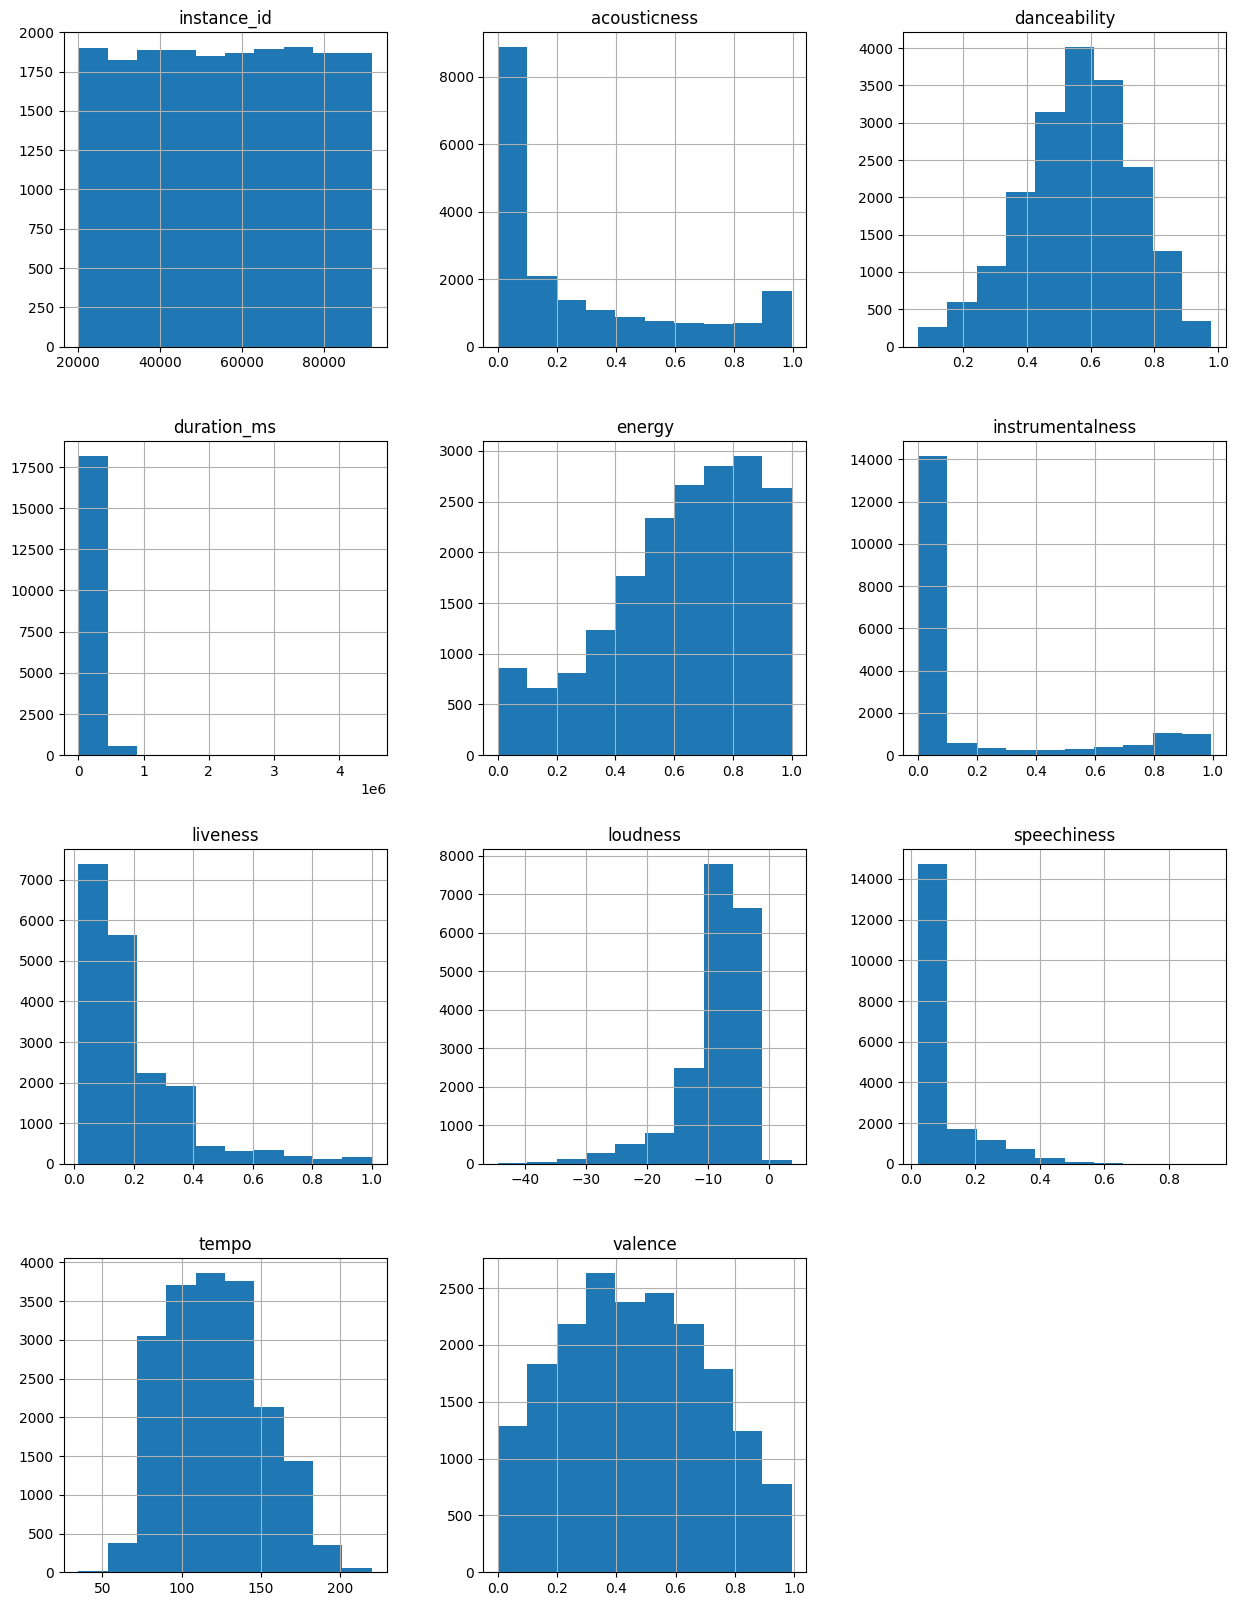

In [23]:
df_train.hist(figsize=(15, 20));

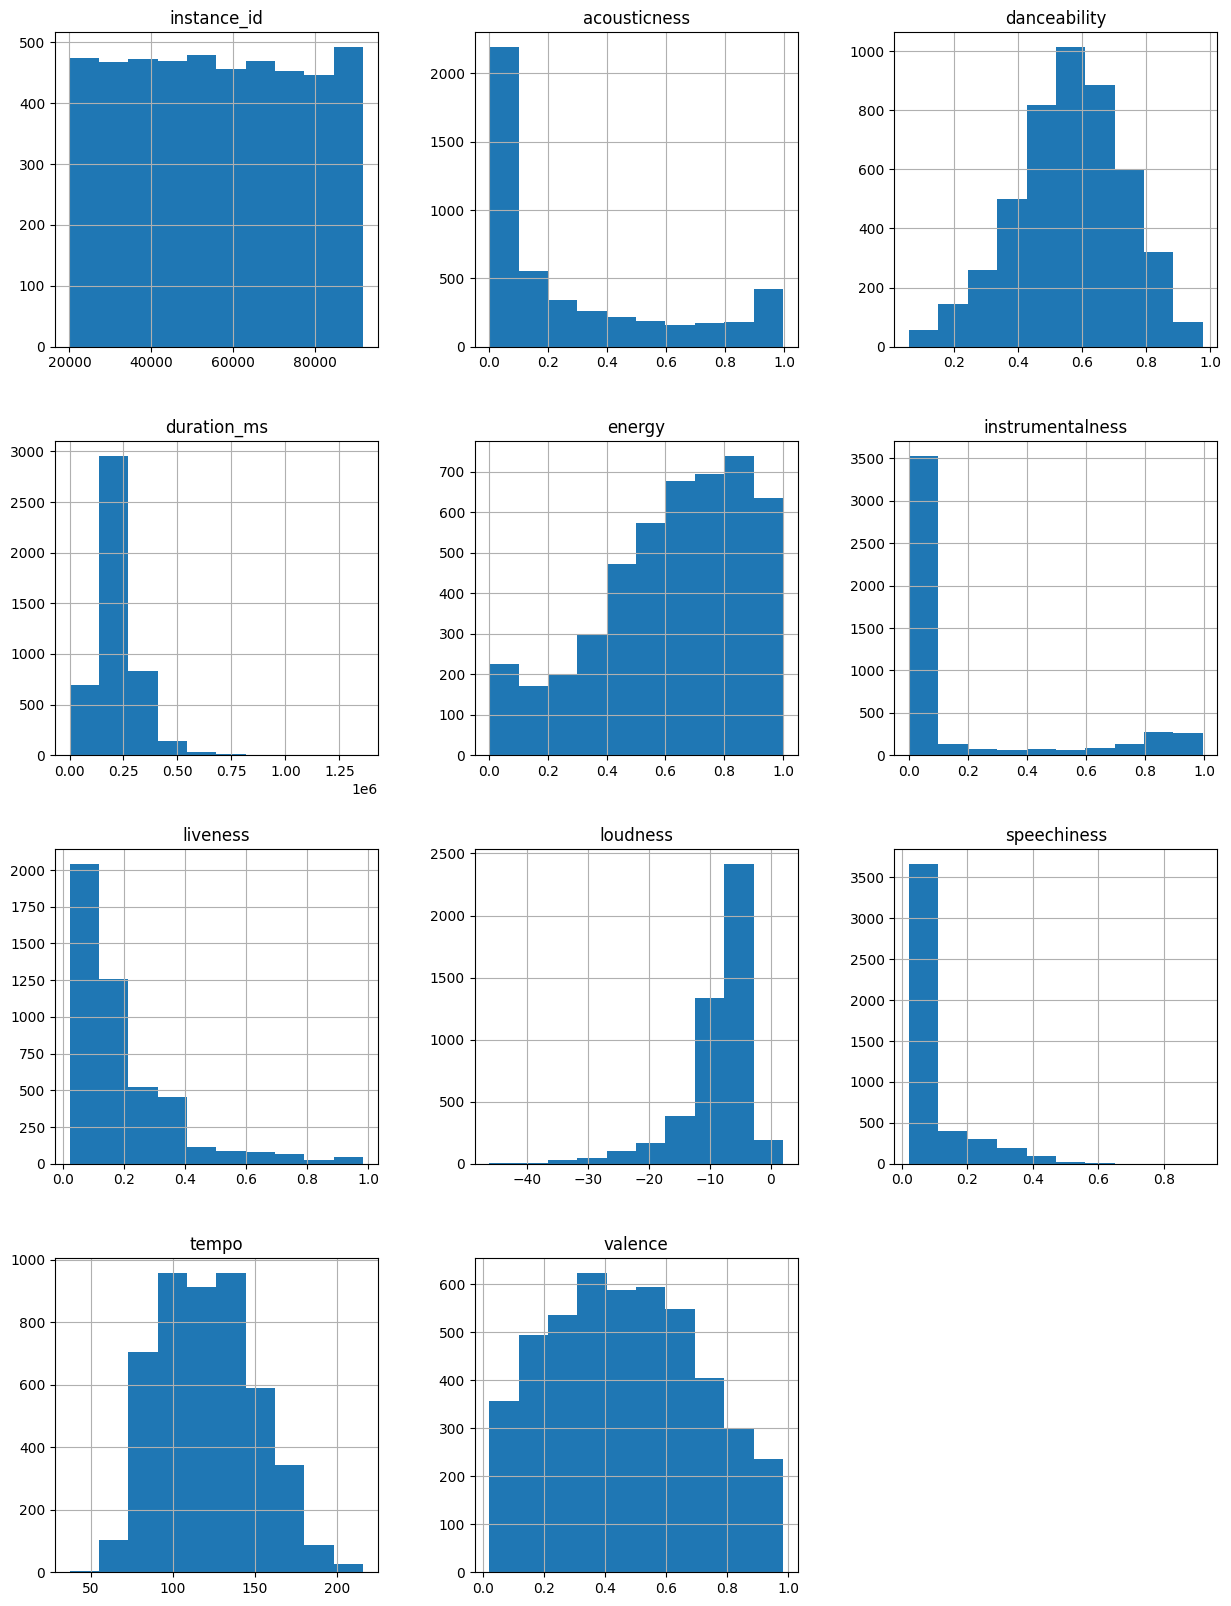

In [24]:
df_test.hist(figsize=(15, 20));

Судя по гистограммам, исправлять ничего не нужно.

<div class="alert alert-warning">🟡</div>

> Для анализа корреляций рекомендую библиотеку **Phik**.  
> Она умеет работать в том числе с нечисловыми признаками.

Проверим данные на мультиколлениарность.

In [25]:
numeric_features = df_train.select_dtypes(include=['float64']).columns

# Убедитесь, что включены константы в модели (если нужно)
X = df_train[numeric_features]
X = sm.add_constant(X)

# Вычисление VIF для каждого количественного признака
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Вывод значений VIF для каждого количественного признака
print(vif_data)

            Variable         VIF
0              const  124.736983
1        instance_id    1.000665
2       acousticness    2.654916
3       danceability    1.538223
4        duration_ms    1.044200
5             energy    4.845629
6   instrumentalness    1.420607
7           liveness    1.063911
8           loudness    4.096615
9        speechiness    1.139657
10             tempo    1.098854
11           valence    1.431718


<div class="alert alert-success">🟢</div>

> Отличное применение `variance_inflation_factor`!  
> И константа не забыта! 👍🏻

In [26]:
numeric_features = df_test.select_dtypes(include=['float64']).columns

# Убедитесь, что включены константы в модели (если нужно)
X = df_test[numeric_features]
X = sm.add_constant(X)

# Вычисление VIF для каждого количественного признака
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Вывод значений VIF для каждого количественного признака
print(vif_data)

            Variable         VIF
0              const  118.237494
1       acousticness    2.673136
2       danceability    1.514197
3        duration_ms    1.035159
4             energy    4.871235
5   instrumentalness    1.448251
6           liveness    1.068603
7           loudness    4.119778
8        speechiness    1.132113
9              tempo    1.090693
10           valence    1.434771


Судя по результатам VIF, в данных нет достаточно сильной корреляции, чтобы нужно было что-то в них исправлять.

Нужно проверить уникальные значения в поле key.

In [27]:
df_train['key'].unique()

array(['D', 'A', 'E', 'G#', 'C', 'D#', 'A#', 'F', 'F#', 'G', 'C#', 'B'],
      dtype=object)

Уникальные значения: A, B, C, D, E, F, G.
Значения повторяющиеся с #: A#, C#, D#, F#, G#.

Так как не всем уникальным символам нашлась пара с #, можно предположить, что это не дубликаты, а уникальные значения, оставим это пока без изменений.

<div class="alert alert-success">🟢</div>

> Верно, в музыке знаком # (диез) обозначают повышение ноты на полтона.

<div class="alert alert-warning">🟡</div>

> В данных есть и другие ошибки. Например, часть треков имеют отрицательную длительность.  
> Это можно было бы заметить на гистограмме, если задать количество корзин побольше, либо построив другие графики: например, график размаха.

Следующим этапом, нужно преобразовать поля mode, key, music genre.

In [28]:
df_train = pd.get_dummies(df_train, columns=['mode'], drop_first=True)

In [29]:
df_train = df_train.rename(columns={'mode_Minor':'mode'})

In [30]:
df_train

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,obtained_date,valence,music_genre,mode
0,25143.0,Highwayman,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,0.0463,101.384,4-Apr,0.450,Country,0
1,26091.0,Toes Across The Floor,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,0.0352,113.071,4-Apr,0.539,Rock,1
2,87888.0,First Person on Earth,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,0.3710,80.980,4-Apr,0.344,Alternative,1
3,77021.0,No Te Veo - Digital Single,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,0.0804,116.007,4-Apr,0.966,Hip-Hop,1
4,20852.0,Chasing Shadows,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,0.0487,76.494,4-Apr,0.583,Alternative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20388,63232.0,Wait (The Whisper Song),0.00112,0.933,179160.0,0.513,0.002480,G,0.1070,-13.203,0.3470,102.017,4-Apr,0.595,Rap,0
20390,44799.0,Mt. Washington,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,0.0299,76.879,4-Apr,0.174,Rock,1
20391,33350.0,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,0.0358,146.803,4-Apr,0.942,Alternative,0
20392,77920.0,4Peat,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,0.3560,150.016,4-Apr,0.215,Rap,0


In [31]:
df_test = pd.get_dummies(df_test, columns=['mode'], drop_first=True)

In [32]:
df_test = df_test.rename(columns={'mode_Minor':'mode'})

In [33]:
df_test

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,obtained_date,valence,mode
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,0.3560,90.361,4-Apr,0.895,1
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,0.0294,78.385,4-Apr,0.318,0
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,0.2220,90.000,4-Apr,0.412,1
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,0.0483,160.046,4-Apr,0.614,0
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,0.2020,73.830,4-Apr,0.121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094,50532,What We Gonna Do About It,0.108000,0.558,163049.0,0.767,0.00000,E,0.0954,-4.561,0.0491,158.019,4-Apr,0.715,1
5095,26255,Marilyn (feat. Dominique Le Jeune),0.131000,0.435,196216.0,0.641,0.00000,A#,0.2730,-7.274,0.1040,115.534,3-Apr,0.156,0
5096,67924,Bipolar,0.152000,0.756,243373.0,0.787,0.00000,D,0.2050,-7.423,0.2400,123.405,4-Apr,0.459,0
5097,79778,Dead - NGHTMRE Remix,0.001450,0.489,185600.0,0.974,0.63800,F#,0.1230,-2.857,0.0381,150.036,4-Apr,0.665,1


Переформатируем столбец instance_id в df_train.

In [34]:
df_train['instance_id'] = df_train['instance_id'].astype('float64')

In [35]:
df_train['instance_id'] = df_train['instance_id'].apply(lambda x: '{:.0f}'.format(x))


In [36]:
df_train


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,obtained_date,valence,music_genre,mode
0,25143,Highwayman,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,0.0463,101.384,4-Apr,0.450,Country,0
1,26091,Toes Across The Floor,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,0.0352,113.071,4-Apr,0.539,Rock,1
2,87888,First Person on Earth,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,0.3710,80.980,4-Apr,0.344,Alternative,1
3,77021,No Te Veo - Digital Single,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,0.0804,116.007,4-Apr,0.966,Hip-Hop,1
4,20852,Chasing Shadows,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,0.0487,76.494,4-Apr,0.583,Alternative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20388,63232,Wait (The Whisper Song),0.00112,0.933,179160.0,0.513,0.002480,G,0.1070,-13.203,0.3470,102.017,4-Apr,0.595,Rap,0
20390,44799,Mt. Washington,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,0.0299,76.879,4-Apr,0.174,Rock,1
20391,33350,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,0.0358,146.803,4-Apr,0.942,Alternative,0
20392,77920,4Peat,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,0.3560,150.016,4-Apr,0.215,Rap,0


Перекодировали столбец mode техникой OHE, так как в этом поле только два значения, а все пропуски мы уже подчистили, решил оставить один столбец.

<div class="alert alert-success">🟢</div>

> `get_dummies` — неплохой метод, но все же не лучший выбор для ML.  
> Предпочтительнее `OrdinalEncoder` или `OneHotEncoder` для признаков и `LabelEncoder` для таргета.

К столбцам key и music_genre применим другую технику кодирования.

In [37]:
encoder_m = OrdinalEncoder()
encoder = OrdinalEncoder()
# Закодируем столбцы 'mode' и 'key'
encoded_column_1 = encoder_m.fit_transform(df_train[['music_genre']])
encoded_column_2 = encoder.fit_transform(df_train[['key']])
# Заменяем исходные значения закодированными
df_train[['music_genre']] = encoded_column_1
df_train[['key']] = encoded_column_2

<div class="alert alert-warning">🟡</div>

> Нет необходимости для каждого столбца создавать отдельный энкодер: метод `fit` принимает данные `array-like of shape` и возвращает `ndarray array of shape`.

In [38]:
df_train

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,obtained_date,valence,music_genre,mode
0,25143,Highwayman,0.48000,0.670,182653.0,0.351,0.017600,5.0,0.1150,-16.842,0.0463,101.384,4-Apr,0.450,4.0,0
1,26091,Toes Across The Floor,0.24300,0.452,187133.0,0.670,0.000051,0.0,0.1080,-8.392,0.0352,113.071,4-Apr,0.539,9.0,1
2,87888,First Person on Earth,0.22800,0.454,173448.0,0.804,0.000000,7.0,0.1810,-5.225,0.3710,80.980,4-Apr,0.344,0.0,1
3,77021,No Te Veo - Digital Single,0.05580,0.847,255987.0,0.873,0.000003,11.0,0.3250,-4.805,0.0804,116.007,4-Apr,0.966,6.0,1
4,20852,Chasing Shadows,0.22700,0.742,195333.0,0.575,0.000002,3.0,0.1760,-5.550,0.0487,76.494,4-Apr,0.583,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20388,63232,Wait (The Whisper Song),0.00112,0.933,179160.0,0.513,0.002480,10.0,0.1070,-13.203,0.3470,102.017,4-Apr,0.595,8.0,0
20390,44799,Mt. Washington,0.19000,0.482,198933.0,0.362,0.005620,9.0,0.0913,-10.358,0.0299,76.879,4-Apr,0.174,9.0,1
20391,33350,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,5.0,0.2840,-4.149,0.0358,146.803,4-Apr,0.942,0.0,0
20392,77920,4Peat,0.00310,0.914,162214.0,0.515,0.000000,4.0,0.1050,-9.934,0.3560,150.016,4-Apr,0.215,8.0,0


In [39]:
encoder_2 = OrdinalEncoder()

# Закодируем столбцы 'mode' и 'key'
encoded_columns = encoder_2.fit_transform(df_test[['key']])

# Заменяем исходные значения закодированными
df_test[['key']] = encoded_columns

<div class="alert alert-danger">🔴</div>

> Для кодирования тестовых данных необходимо применять метод `transform` к энкодеру, обученному на обучающих данных.  
> Иначе, например, может оказаться так, что в обучающих и тестовых данных одинаковые значения закодированы разными числами.

In [40]:
df_test

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,obtained_date,valence,mode
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,1.0,0.3030,-7.136,0.3560,90.361,4-Apr,0.895,1
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,11.0,0.0849,-5.175,0.0294,78.385,4-Apr,0.318,0
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,0.0,0.1090,-4.399,0.2220,90.000,4-Apr,0.412,1
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,2.0,0.1220,-4.604,0.0483,160.046,4-Apr,0.614,0
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,5.0,0.0374,-8.833,0.2020,73.830,4-Apr,0.121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094,50532,What We Gonna Do About It,0.108000,0.558,163049.0,0.767,0.00000,7.0,0.0954,-4.561,0.0491,158.019,4-Apr,0.715,1
5095,26255,Marilyn (feat. Dominique Le Jeune),0.131000,0.435,196216.0,0.641,0.00000,1.0,0.2730,-7.274,0.1040,115.534,3-Apr,0.156,0
5096,67924,Bipolar,0.152000,0.756,243373.0,0.787,0.00000,5.0,0.2050,-7.423,0.2400,123.405,4-Apr,0.459,0
5097,79778,Dead - NGHTMRE Remix,0.001450,0.489,185600.0,0.974,0.63800,9.0,0.1230,-2.857,0.0381,150.036,4-Apr,0.665,1


Столбец track_name нам врядли пригодятся, можно его смело дропнуть.

In [41]:
df_train = df_train.drop(['track_name'], axis=1)

In [42]:
df_train

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,obtained_date,valence,music_genre,mode
0,25143,0.48000,0.670,182653.0,0.351,0.017600,5.0,0.1150,-16.842,0.0463,101.384,4-Apr,0.450,4.0,0
1,26091,0.24300,0.452,187133.0,0.670,0.000051,0.0,0.1080,-8.392,0.0352,113.071,4-Apr,0.539,9.0,1
2,87888,0.22800,0.454,173448.0,0.804,0.000000,7.0,0.1810,-5.225,0.3710,80.980,4-Apr,0.344,0.0,1
3,77021,0.05580,0.847,255987.0,0.873,0.000003,11.0,0.3250,-4.805,0.0804,116.007,4-Apr,0.966,6.0,1
4,20852,0.22700,0.742,195333.0,0.575,0.000002,3.0,0.1760,-5.550,0.0487,76.494,4-Apr,0.583,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20388,63232,0.00112,0.933,179160.0,0.513,0.002480,10.0,0.1070,-13.203,0.3470,102.017,4-Apr,0.595,8.0,0
20390,44799,0.19000,0.482,198933.0,0.362,0.005620,9.0,0.0913,-10.358,0.0299,76.879,4-Apr,0.174,9.0,1
20391,33350,0.00061,0.663,220947.0,0.886,0.000025,5.0,0.2840,-4.149,0.0358,146.803,4-Apr,0.942,0.0,0
20392,77920,0.00310,0.914,162214.0,0.515,0.000000,4.0,0.1050,-9.934,0.3560,150.016,4-Apr,0.215,8.0,0


In [43]:
df_test = df_test.drop(['track_name'], axis=1)

In [44]:
df_test

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,obtained_date,valence,mode
0,48564,0.301000,0.757,146213.0,0.679,0.00000,1.0,0.3030,-7.136,0.3560,90.361,4-Apr,0.895,1
1,72394,0.538000,0.256,240360.0,0.523,0.00832,11.0,0.0849,-5.175,0.0294,78.385,4-Apr,0.318,0
2,88081,0.005830,0.678,284000.0,0.770,0.00000,0.0,0.1090,-4.399,0.2220,90.000,4-Apr,0.412,1
3,78331,0.020300,0.592,177354.0,0.749,0.00000,2.0,0.1220,-4.604,0.0483,160.046,4-Apr,0.614,0
4,72636,0.000335,0.421,-1.0,0.447,0.01480,5.0,0.0374,-8.833,0.2020,73.830,4-Apr,0.121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094,50532,0.108000,0.558,163049.0,0.767,0.00000,7.0,0.0954,-4.561,0.0491,158.019,4-Apr,0.715,1
5095,26255,0.131000,0.435,196216.0,0.641,0.00000,1.0,0.2730,-7.274,0.1040,115.534,3-Apr,0.156,0
5096,67924,0.152000,0.756,243373.0,0.787,0.00000,5.0,0.2050,-7.423,0.2400,123.405,4-Apr,0.459,0
5097,79778,0.001450,0.489,185600.0,0.974,0.63800,9.0,0.1230,-2.857,0.0381,150.036,4-Apr,0.665,1


Столбец obtained_date вряд ли сильно влияет на жанр музыки, его тоже можно дропнуть.

In [45]:
df_train = df_train.drop(['obtained_date'], axis=1)

In [46]:
df_test = df_test.drop(['obtained_date'], axis=1)

По результатам проведённого анализа можно сказать следующее. В данных присутствовало незначительное колличество пропусков, которые можно было удалить без дальнейшего ущерба для исследования. Проблемы с распределением и мультиколлинеарностью мною обнаружены не были. В поле key были обнаружены символы в сочетании с #, но так как я не могу с уверенностью утвержать, что это скрытые дубликаты, а не уникальные значения, я решил их оставить. Также был перекодированы столбецы mode, key и music_genre для целей дальнейшего обучения модели.

### 3. Обучение модели

### Случайный лес

In [47]:
features = df_train.drop(['music_genre'], axis=1)
target = df_train['music_genre']

In [48]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345)

In [49]:
best_f1_score = 0  
best_est = 0
best_depth = 0

for est in range(10, 150, 10):
    for depth in range(1, 15):
        model_forest = RandomForestClassifier(random_state=12345,
                                              n_estimators=est, 
                                              max_depth=depth,
                                              class_weight='balanced')
        model_forest.fit(features_train, target_train)
        predictions_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_forest, average='weighted')  # Заменено на 'weighted'
        if f1_forest > best_f1_score:
            best_model = model_forest
            best_f1_score = f1_forest  
            best_est = est
            best_depth = depth

print('Оптимальное количество оценок =', best_est)
print('Оптимальная глубина дерева =', best_depth)

Оптимальное количество оценок = 100
Оптимальная глубина дерева = 14


<div class="alert alert-warning">🟡</div>

> Подбор гиперпараметров с помощью вложенных циклов подходит лишь в учебных целях для демонстрации базового принципа.  
> Для более продуктивной работы необходимо освоить специализированные техники.
> 
> Для подбора гиперпараметров [**RandomizedSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) обычно дает результат лучше, чем [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) при тех же затратах времени. Кроме того, он имеет больше возможностей для управления процессом.
>
> Часто советуют сначала выполнить **RandomizedSearchCV**, а затем **GridSearchCV** для более тонкой настройки.  
> На мой взгляд, гораздо продуктивнее освоить какую-либо более продвинутую библиотеку для подбора гиперпараметров, вроде [**Optuna**](https://optuna.org/). Время, потраченное на изучение, быстро окупится в работе.  
> Для первого знакомства у нее есть такая отличная штука — [**OptunaSearchCV**](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html). Интерфейс практически такой же, как у **RandomizedSearchCV**, поэтому очень легко начать пользоваться таким полезным инструментом.

In [54]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=14, class_weight='balanced')
model_forest.fit(features_train, target_train)
predictions_valid_forest = model_forest.predict(features_valid)
f1_score_gb_1 = f1_score(target_valid, predictions_valid_forest, average='weighted')

print("F1_tree:", f1_score(target_valid, predictions_valid_forest, average='weighted'))
print("Accuracy:", accuracy_score(target_valid, predictions_valid_forest))
print("\nClassification Report:\n", classification_report(target_valid, predictions_valid_forest))
probabilities_valid = model_forest.predict_proba(features_valid)
print("ROC-AUC_forest:", roc_auc_score(target_valid, probabilities_valid, multi_class='ovo'))


F1_tree: 0.44765929386119335
Accuracy: 0.4628099173553719

Classification Report:
               precision    recall  f1-score   support

         0.0       0.36      0.27      0.31       464
         1.0       0.55      0.53      0.54       361
         2.0       0.46      0.48      0.47       521
         3.0       0.74      0.85      0.79       237
         4.0       0.43      0.64      0.51       391
         5.0       0.60      0.65      0.62       505
         6.0       0.18      0.19      0.19       183
         7.0       0.34      0.28      0.31       251
         8.0       0.46      0.54      0.49       445
         9.0       0.25      0.12      0.16       393

    accuracy                           0.46      3751
   macro avg       0.44      0.45      0.44      3751
weighted avg       0.45      0.46      0.45      3751

ROC-AUC_forest: 0.8699929878669417


<div class="alert alert-success">🟢</div>

> `classification_report` отлично подходит для этой задачи! 👍🏻

### Бустинг

In [55]:

best_f1_score = 0  
best_est = 0
best_depth = 0

for est in range(1, 100, 20):
    for depth in range(1, 20):
        model_gb = GradientBoostingClassifier(random_state=12345,
                                              n_estimators=est, 
                                              max_depth=depth)
        model_gb.fit(features_train, target_train)
        predictions_valid_gb = model_gb.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_gb, average='weighted')  # Заменено на 'weighted'
        if f1_forest > best_f1_score:
            best_model = model_gb
            best_f1_score = f1_forest  
            best_est = est
            best_depth = depth

print('Оптимальное количество оценок =', best_est)
print('Оптимальная глубина дерева =', best_depth)


KeyboardInterrupt: 

<div class="alert alert-success">🟢</div>

> Существенно сократить время на оптимизацию гиперпараметров поможет библиотека **Optuna**.

In [ ]:
model_gb_1 = GradientBoostingClassifier(random_state=12345,
                                      n_estimators=61, 
                                      max_depth=5)
model_gb_1.fit(features_train, target_train)
predictions_valid_gb_1 = model_gb.predict(features_valid)

f1_score_gb_1 = f1_score(target_valid, predictions_valid_gb_1, average='weighted')

print("F1_gb:", f1_score(target_valid, predictions_valid_gb_1, average='weighted'))
print("Accuracy:", accuracy_score(target_valid, predictions_valid_gb_1))
print("\nClassification Report:\n", classification_report(target_valid, predictions_valid_gb_1))


probabilities_valid = model_gb_1.predict_proba(features_valid)
print("ROC-AUC_forest:", roc_auc_score(target_valid, probabilities_valid, multi_class='ovo'))


### Тестирование лучшей модели

По результатам тестирования победила модель случайного леса, осталось сделать на ней предсказания.

In [56]:
predictions_forest_final = model_forest.predict(df_test)

In [58]:
predictions_forest_final = encoder_m.inverse_transform(predictions_forest_final.reshape(-1, 1))

In [60]:
predictions_df = pd.DataFrame(predictions_forest_final, columns=['music_genre'])

# Объедините DataFrame df_test и predictions_df по столбцу 'instance_id'
result_df = pd.concat([df_test['instance_id'], predictions_df], axis=1)

# Сохраните результат в CSV файл
result_df.to_csv('result_with_predictions.csv', index=False)

In [61]:
result_df 


,instance_id,music_genre
0,48564.0,Rap
1,72394.0,Rock
2,88081.0,Rap
3,78331.0,Country
4,72636.0,Alternative
...,...,...
5094,50532.0,NaN
5095,26255.0,NaN
5096,67924.0,NaN
5097,79778.0,NaN


In [62]:
result_df.isna().sum()


instance_id    376
music_genre    376
dtype: int64

<div class="alert alert-success">🟢</div>

> Хочу отметить:
> - Хороший EDA;
> - применение VIF;
> - `classification_report` для комплексной оценки моделей.

> Чтобы улучшить этот проект рекомендую:
> - найти и исправить ошибки в данных;
> - попробовать другие способы восстановления пропущенных значений;
> - попробовать создать новые признаки;
> - начать изучение пайплайнов, построить простой пайплайн для этого проекта;
> - оптимизировать гиперпараметры для начала с RandomizedSearchCV, а в будущем попробовать библиотеку Optuna;
> - проанализировать полученный результат: в частности, сделать анализ значимости признаков;
> - подвести итог работы.

> Надеюсь, у тебя будет время и желание поработать с этим проектом еще, чтобы включить его в портфолио.